In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_error, mean_squared_log_error

from pylab import rcParams
from tqdm import tqdm_notebook
import fbprophet

In [2]:
# df_merged_no_hol_old = pd.read_csv('usage_and_failed_search_no_hol.csv')
df_merged_no_hol = pd.read_csv('no_hol_v2_edited.csv')

In [3]:
df_o = df_merged_no_hol[df_merged_no_hol['Station_depart.'] == '12 CU Terrace']
df_od = df_o[df_o['Station_dest.'] == '04 Engineering']

df_od.head(14)

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.
128,7/1/2019,8:44:00,9:02:11,9:08:28,CP#0PFV4,12 CU Terrace,04 Engineering
129,7/1/2019,8:50:49,8:51:18,8:58:37,CP#0PVP6,12 CU Terrace,04 Engineering
130,7/1/2019,11:05:15,11:06:27,11:11:10,CP#0PGZ3,12 CU Terrace,04 Engineering
131,7/1/2019,12:37:46,12:39:18,12:44:42,CP#0PVP6,12 CU Terrace,04 Engineering
132,7/1/2019,13:39:56,13:40:42,13:45:58,CP#0S822,12 CU Terrace,04 Engineering
220,8/1/2019,8:31:41,NaN,NaN,CP#0PFV4,12 CU Terrace,04 Engineering
221,8/1/2019,9:04:22,9:05:25,9:13:10,CP#0PFW8,12 CU Terrace,04 Engineering
222,8/1/2019,9:46:47,NaN,NaN,CP#0ST20,12 CU Terrace,04 Engineering
223,8/1/2019,15:43:49,15:44:46,15:56:20,CP#0QKM0,12 CU Terrace,04 Engineering
443,10/1/2019,8:50:22,NaN,NaN,CP#0Q1G0,12 CU Terrace,04 Engineering


In [4]:
df_od['DateTime'] = df_od[df_od.columns[0:2]].apply(lambda x : '/' .join(x.astype(str)),axis=1)
df_od['DateTime'] = df_od['DateTime'].str.replace(":", "/")

demand = []
demand = [1] * len(df_od)
df_od['Demand'] = demand
df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
128,7/1/2019,8:44:00,9:02:11,9:08:28,CP#0PFV4,12 CU Terrace,04 Engineering,7/1/2019/8/44/00,1
129,7/1/2019,8:50:49,8:51:18,8:58:37,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/8/50/49,1
130,7/1/2019,11:05:15,11:06:27,11:11:10,CP#0PGZ3,12 CU Terrace,04 Engineering,7/1/2019/11/05/15,1
131,7/1/2019,12:37:46,12:39:18,12:44:42,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/12/37/46,1
132,7/1/2019,13:39:56,13:40:42,13:45:58,CP#0S822,12 CU Terrace,04 Engineering,7/1/2019/13/39/56,1
...,...,...,...,...,...,...,...,...,...
18839,27/9/2019,12:27:03,12:43:14,12:50:36,CP#0VBN2,12 CU Terrace,04 Engineering,27/9/2019/12/27/03,1
18840,27/9/2019,16:16:45,16:22:32,16:27:29,CP#0SF89,12 CU Terrace,04 Engineering,27/9/2019/16/16/45,1
18948,30/9/2019,7:59:18,NaN,NaN,CP#0SZM7,12 CU Terrace,04 Engineering,30/9/2019/7/59/18,1
18949,30/9/2019,8:32:13,8:32:46,8:38:59,CP#0V2Y4,12 CU Terrace,04 Engineering,30/9/2019/8/32/13,1


In [5]:
df_od['Date'] = pd.to_datetime(df_od['Date'], dayfirst=True)
df_od.set_index('Date', inplace=True)
# df_train = df_train_clone = df_od[:'2019-04-30']
# df_test = df_test_clone = df_od['2019-05-01':'2019-05-23']
df_train = df_train_clone = df_od[:'2019-03-29']
df_test = df_test_clone = df_od['2019-04-01':'2019-04-30']
df_train2 = df_train_clone2 = df_od['2019-08-13':'2019-09-20']
df_test2 = df_test_clone2 = df_od['2019-09-23':'2019-09-30']
# df_cv = df_cv_clone = df_od[:'2019-05-23']
df_train_clone = df_train_clone.reset_index()
df_test_clone = df_test_clone.reset_index()
df_train_clone2 = df_train_clone2.reset_index()
df_test_clone2 = df_test_clone2.reset_index()
# df_cv_clone = df_cv_clone.reset_index()
df_train_clone

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
0,2019-01-07,8:44:00,9:02:11,9:08:28,CP#0PFV4,12 CU Terrace,04 Engineering,7/1/2019/8/44/00,1
1,2019-01-07,8:50:49,8:51:18,8:58:37,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/8/50/49,1
2,2019-01-07,11:05:15,11:06:27,11:11:10,CP#0PGZ3,12 CU Terrace,04 Engineering,7/1/2019/11/05/15,1
3,2019-01-07,12:37:46,12:39:18,12:44:42,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/12/37/46,1
4,2019-01-07,13:39:56,13:40:42,13:45:58,CP#0S822,12 CU Terrace,04 Engineering,7/1/2019/13/39/56,1
...,...,...,...,...,...,...,...,...,...
180,2019-03-27,10:28:27,10:39:43,10:45:00,CP#0S6F7,12 CU Terrace,04 Engineering,27/3/2019/10/28/27,1
181,2019-03-28,8:46:24,8:47:04,8:52:36,CP#0T0H0,12 CU Terrace,04 Engineering,28/3/2019/8/46/24,1
182,2019-03-28,9:21:33,9:22:09,9:29:53,CP#0SZM7,12 CU Terrace,04 Engineering,28/3/2019/9/21/33,1
183,2019-03-29,8:59:00,8:59:57,9:07:25,CP#0PVP6,12 CU Terrace,04 Engineering,29/3/2019/8/59/00,1


In [6]:
print(len(list(dict.fromkeys(df_test_clone['Date']))))

18


In [7]:
start = 7
stop = 21.5
days_forecast = 18
#14*15+45 or 18*15+60 (train = :2019-03-29) or  for 2018/2, 6 for 2019/1
hours_multiplier = 15
prediction_size = days_forecast*hours_multiplier+60

In [8]:
df_od = df_od.reset_index()
df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
0,2019-01-07,8:44:00,9:02:11,9:08:28,CP#0PFV4,12 CU Terrace,04 Engineering,7/1/2019/8/44/00,1
1,2019-01-07,8:50:49,8:51:18,8:58:37,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/8/50/49,1
2,2019-01-07,11:05:15,11:06:27,11:11:10,CP#0PGZ3,12 CU Terrace,04 Engineering,7/1/2019/11/05/15,1
3,2019-01-07,12:37:46,12:39:18,12:44:42,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/12/37/46,1
4,2019-01-07,13:39:56,13:40:42,13:45:58,CP#0S822,12 CU Terrace,04 Engineering,7/1/2019/13/39/56,1
...,...,...,...,...,...,...,...,...,...
573,2019-09-27,12:27:03,12:43:14,12:50:36,CP#0VBN2,12 CU Terrace,04 Engineering,27/9/2019/12/27/03,1
574,2019-09-27,16:16:45,16:22:32,16:27:29,CP#0SF89,12 CU Terrace,04 Engineering,27/9/2019/16/16/45,1
575,2019-09-30,7:59:18,NaN,NaN,CP#0SZM7,12 CU Terrace,04 Engineering,30/9/2019/7/59/18,1
576,2019-09-30,8:32:13,8:32:46,8:38:59,CP#0V2Y4,12 CU Terrace,04 Engineering,30/9/2019/8/32/13,1


In [9]:
def fill_missing(df, df_main, type):
    date = list(dict.fromkeys(df_main['Date']))
    if (type == True):
        oper_time = list(np.arange(start, stop, 0.5))
    else:
        oper_time = list(np.arange(start, stop))
    timestamp_all = []

    for each in date:
        each = str(each)
        each = each[0:11]
        for h in oper_time:
            (y, m, d) = each.split('-')
            d, m, y, hh = int(d), int(m), int(y), int(h)
            if (((h*10)%10) == 5):
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh, minute=30)
            else:
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
            timestamp_all.append(timestamp)

    timestamp_fill = list(set(timestamp_all) - set((list(dict.fromkeys(df_main['Timestamp'])))))
    
    demand_fill = []
    demand_fill = [0] * len(timestamp_fill)

    data_fill = {'Timestamp': timestamp_fill, 'Demand': demand_fill}    
    df_od_fill = pd.DataFrame(data_fill)
    df_od_fill = df_od_fill.sort_values('Timestamp')
    df_od_fill = df_od_fill.reset_index(drop=True)
    
    df, backup = group_by_time(df)
    
    df = df.append(df_od_fill)
    df = df.sort_values('Timestamp')
    df = df.reset_index(drop=True)
    
    return df

def group_by_time(df):
    df = df.groupby('Timestamp').sum()
    backup = df
    df = df.reset_index()
    
    return df, backup

def create_window(df, type):
    converted_regist = []

    for slot in df['regist_dt_ICT']:
        (h, m, s) = slot.split(':')
        if (type == True):
            if (int(m) >= 30):
                time = int(h) + 0.5
            else:
                time = int(h)
        else:
            time = int(h)
        converted_regist.append(time)    

    df['Converted_Regist'] = converted_regist

    df = df[df['Converted_Regist'] >= start]
    df = df[df['Converted_Regist'] < stop]
    df = df.drop(['Converted_Regist'], axis=1)
    
    return df

def create_timestamp(df, type): 
    timestamp_converted = []
    for slot in df['DateTime']:
        (d, m, y, hh, mm, ss) = slot.split('/')
        d, m, y, hh, mm = int(d), int(m), int(y), int(hh), int(mm)
        if (type == True):
            if (mm >= 30):
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh, minute=30)
            else:
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        else:
            timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        timestamp_converted.append(timestamp)
    df['Timestamp'] = timestamp_converted
    
    return df

In [10]:
df_train_clone = create_timestamp(df_train_clone, True)
train_framed = create_window(df_train_clone, True)
train, backup_train = group_by_time(train_framed)
train = train_clone = fill_missing(train, df_train_clone, True)
train

,Timestamp,Demand
0,2019-01-07 07:00:00,0
1,2019-01-07 07:30:00,0
2,2019-01-07 08:00:00,0
3,2019-01-07 08:30:00,2
4,2019-01-07 09:00:00,0
...,...,...
1590,2019-03-29 19:00:00,0
1591,2019-03-29 19:30:00,0
1592,2019-03-29 20:00:00,0
1593,2019-03-29 20:30:00,0


In [11]:
df_test_clone = create_timestamp(df_test_clone, False)
test_framed = create_window(df_test_clone, False)
test, backup_test = group_by_time(test_framed)
test = test_clone = fill_missing(test, df_test_clone, False)
test

,Timestamp,Demand
0,2019-04-01 07:00:00,1
1,2019-04-01 08:00:00,1
2,2019-04-01 09:00:00,1
3,2019-04-01 10:00:00,0
4,2019-04-01 11:00:00,1
...,...,...
265,2019-04-30 17:00:00,0
266,2019-04-30 18:00:00,0
267,2019-04-30 19:00:00,0
268,2019-04-30 20:00:00,0


In [12]:
df_train_clone2 = create_timestamp(df_train_clone2, True)
train_framed2 = create_window(df_train_clone2, True)
train2, backup_train2 = group_by_time(train_framed2)
train2 = train_clone2 = fill_missing(train2, df_train_clone2, True)
train2

,Timestamp,Demand
0,2019-08-13 07:00:00,0
1,2019-08-13 07:30:00,1
2,2019-08-13 08:00:00,0
3,2019-08-13 08:30:00,0
4,2019-08-13 09:00:00,1
...,...,...
807,2019-09-20 19:00:00,0
808,2019-09-20 19:30:00,0
809,2019-09-20 20:00:00,0
810,2019-09-20 20:30:00,0


In [13]:
df_test_clone2 = create_timestamp(df_test_clone2, False)
test_framed2= create_window(df_test_clone2, False)
test2, backup_test2 = group_by_time(test_framed2)
test2 = test_clone2 = fill_missing(test2, df_test_clone2, False)
test2

,Timestamp,Demand
0,2019-09-23 07:00:00,1
1,2019-09-23 08:00:00,1
2,2019-09-23 09:00:00,1
3,2019-09-23 10:00:00,0
4,2019-09-23 11:00:00,2
...,...,...
85,2019-09-30 17:00:00,0
86,2019-09-30 18:00:00,0
87,2019-09-30 19:00:00,0
88,2019-09-30 20:00:00,0


In [14]:
# cv, backup_cv = group_by_time(df_cv)
# cv = fill_missing(cv, df_cv_clone)
# cv

In [15]:
# df_prophet = cv[['Timestamp', 'Demand']]
# df_prophet = df_prophet.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
# df_prophet

In [16]:
df_prophet = train[['Timestamp', 'Demand']]
df_prophet = df_prophet.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
df_prophet

,ds,y
0,2019-01-07 07:00:00,0
1,2019-01-07 07:30:00,0
2,2019-01-07 08:00:00,0
3,2019-01-07 08:30:00,2
4,2019-01-07 09:00:00,0
...,...,...
1590,2019-03-29 19:00:00,0
1591,2019-03-29 19:30:00,0
1592,2019-03-29 20:00:00,0
1593,2019-03-29 20:30:00,0


In [17]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)
df_prophet['cap'] = 5
df_prophet['floor'] = 0
m = Prophet(growth='logistic', changepoint_prior_scale=0.6)
#best: yhat scale 0.6 round at 3.7, yhat_upper 0.8 round at 8
# m = Prophet(changepoint_prior_scale=0.2)
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [18]:
future = m.make_future_dataframe(periods=800, freq='H')
future['cap'] = 5
future['floor'] = 0
future = future[(future['ds'].dt.hour >= start) & (future['ds'].dt.hour < stop)]
future = future[future['ds'].dt.dayofweek < 5]
forecast = m.predict(future)
yhat_round = []
for each in forecast['yhat']:
    if(each < 0):
        each = 0
    elif ((each*10)%10 >= 3.7):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    yhat_round.append(each)
# forecast['yhat_round'] = yhat_round
# forecast[['ds', 'yhat_round', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast['yhat_nr'] = forecast['yhat']
forecast['yhat'] = yhat_round
forecast[['ds', 'yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_nr,yhat_lower,yhat_upper
0,2019-01-07 07:00:00,0,0.062954,-0.327530,0.494444
1,2019-01-07 07:30:00,0,0.270354,-0.147558,0.705302
2,2019-01-07 08:00:00,1,0.390883,-0.025035,0.781567
3,2019-01-07 08:30:00,1,0.426997,0.007230,0.852406
4,2019-01-07 09:00:00,1,0.396287,-0.018657,0.819350
...,...,...,...,...,...
1935,2019-05-01 17:00:00,0,0.027560,-0.360210,0.451671
1936,2019-05-01 18:00:00,0,0.044738,-0.354071,0.498235
1937,2019-05-01 19:00:00,0,0.010737,-0.398312,0.443591
1938,2019-05-01 20:00:00,0,-0.032367,-0.407903,0.395762


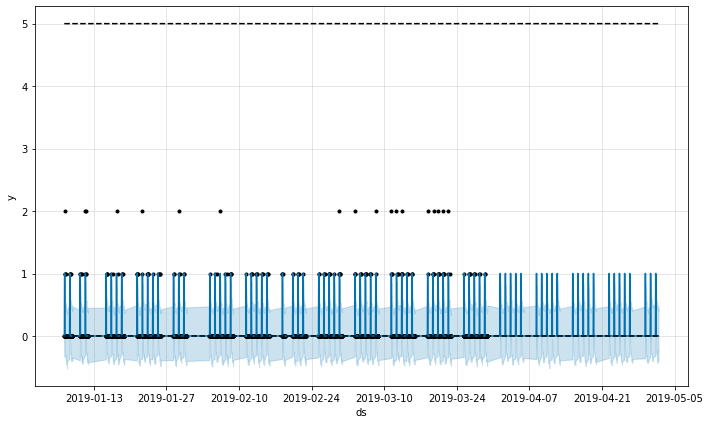

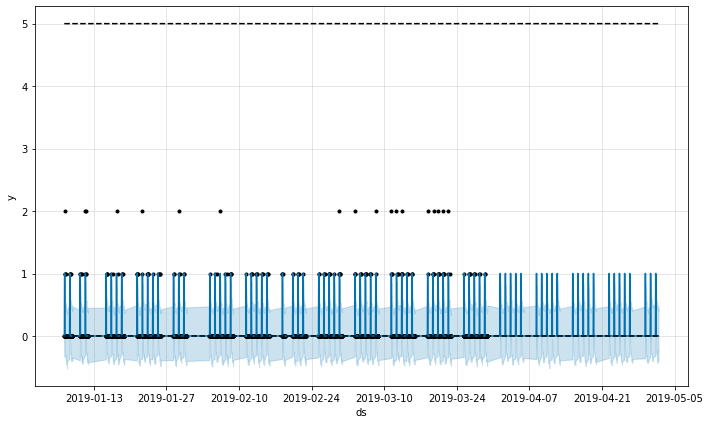

In [19]:
m.plot(forecast)

In [20]:
# train_clone = train_clone.set_index('Timestamp')
# test_clone = test_clone.set_index('Timestamp')
# train_clone2 = train_clone2.set_index('Timestamp')
# test_clone2 = test_clone2.set_index('Timestamp')

# plt.figure(figsize=(12,6))
# plt.subplot(211)
# plt.plot(train_clone)
# plt.plot(test_clone)
# plt.subplot(212)
# plt.plot(train_clone2)
# plt.plot(test_clone2)

In [21]:
def join_eva(train, forecast, prediction_size):
    forecast = forecast[:prediction_size]
    return forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(train.set_index('ds'))

def cal_SMAPE(df):
    smape = 100/len(df) * np.sum(2 * np.abs(df['yhat'] - df['y']) / (np.abs(df['y']) + np.abs(df['yhat'])))
    print(df)
    return 'sMAPE', smape, 'accuracy', 100-smape

train = join_eva(df_prophet, forecast, len(df_prophet))

print(cal_SMAPE(train))

                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-01-07 07:00:00     0  0.062954   -0.327530    0.494444  0    5      0
2019-01-07 07:30:00     0  0.270354   -0.147558    0.705302  0    5      0
2019-01-07 08:00:00     1  0.390883   -0.025035    0.781567  0    5      0
2019-01-07 08:30:00     1  0.426997    0.007230    0.852406  2    5      0
2019-01-07 09:00:00     1  0.396287   -0.018657    0.819350  0    5      0
...                   ...       ...         ...         ... ..  ...    ...
2019-03-29 19:00:00     0  0.002999   -0.407558    0.437867  0    5      0
2019-03-29 19:30:00     0 -0.025439   -0.466538    0.362275  0    5      0
2019-03-29 20:00:00     0 -0.042063   -0.478193    0.363626  0    5      0
2019-03-29 20:30:00     0 -0.028567   -0.426134    0.381530  0    5      0
2019-03-29 21:00:00     0  0.030211   -0.408378    0.489618  0    5      0

[1595 rows x 7 columns]


In [22]:
def join_test(test, forecast, prediction_size):
    df_test = test.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
    forecast = forecast[len(df_prophet):len(df_prophet)+prediction_size]
    return forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(df_test.set_index('ds'))

eva_df = join_test(test, forecast, prediction_size)

print(cal_SMAPE(eva_df))

                     yhat   yhat_nr  yhat_lower  yhat_upper    y
ds                                                              
2019-04-01 07:00:00     0  0.062955   -0.343978    0.448717  1.0
2019-04-01 08:00:00     1  0.390884   -0.023271    0.804559  1.0
2019-04-01 09:00:00     1  0.396288   -0.014844    0.825814  1.0
2019-04-01 10:00:00     0  0.241917   -0.152942    0.667603  0.0
2019-04-01 11:00:00     0  0.120365   -0.334575    0.507427  1.0
...                   ...       ...         ...         ...  ...
2019-04-30 17:00:00     0  0.054584   -0.352080    0.505507  0.0
2019-04-30 18:00:00     0  0.077213   -0.330589    0.490691  0.0
2019-04-30 19:00:00     0  0.048247   -0.338468    0.491873  0.0
2019-04-30 20:00:00     0  0.009698   -0.397886    0.451286  0.0
2019-04-30 21:00:00     0  0.088335   -0.334837    0.483446  0.0

[330 rows x 5 columns]
('sMAPE', 25.252525252525253, 'accuracy', 74.74747474747474)


In [23]:
eva_df.tail(45)

,yhat,yhat_nr,yhat_lower,yhat_upper,y
ds,,,,,
2019-04-26 07:00:00,0,0.099367,-0.323037,0.488078,1.0
2019-04-26 08:00:00,1,0.428966,0.004532,0.838490,2.0
2019-04-26 09:00:00,1,0.435618,0.033836,0.858983,1.0
2019-04-26 10:00:00,0,0.282031,-0.123130,0.665036,0.0
2019-04-26 11:00:00,0,0.160764,-0.225990,0.592022,0.0
2019-04-26 12:00:00,0,0.135851,-0.269559,0.542585,1.0
2019-04-26 13:00:00,0,0.143655,-0.293442,0.547119,0.0
2019-04-26 14:00:00,0,0.111165,-0.282413,0.539652,0.0
2019-04-26 15:00:00,0,0.046237,-0.352026,0.501250,0.0


In [ ]:
scales = np.arange(0.1,1.0,0.1)
rounding_boundary = np.arange(1, 10, 1)

def grid_search():
    scale = [] 
    round_at = []
    eva_acc = []
    test_acc = []
    for param in scales:
        for boundary in rounding_boundary:
            scale.append(param)
            round_at.append(boundary)
            df_prophet['cap'] = 5
            df_prophet['floor'] = 0
            m = Prophet(growth='logistic', changepoint_prior_scale=param)
#             m = Prophet(changepoint_prior_scale=param) 
            m.fit(df_prophet)
            future = m.make_future_dataframe(periods=768, freq='H')
            future['cap'] = 5
            future['floor'] = 0
            future = future[(future['ds'].dt.hour >= start) & (future['ds'].dt.hour < stop)]
            future = future[future['ds'].dt.dayofweek < 5]
            forecast = m.predict(future)
            yhat_round = []            
            for each in forecast['yhat']:
                if (each < 0):
                    each = 0
                elif (((each*10)%10) >= boundary):
                    each = math.ceil(each)
                else:
                    each = math.floor(each)
                yhat_round.append(each)
            forecast['yhat_nr'] = forecast['yhat']
            forecast['yhat'] = yhat_round

            train = join_eva(df_prophet, forecast, len(df_prophet))
            acc = cal_SMAPE(train)
            eva_acc.append(acc)

            eva_df = join_test(test2, forecast, prediction_size)
            acc = cal_SMAPE(eva_df)
            test_acc.append(acc)
    
    return scale, round_at, eva_acc, test_acc

In [ ]:
scale, round_at, eva_acc, test_acc = grid_search()
grid = {'Scale': scale, 'Round at': round_at, 'Fit': eva_acc, 'Test': test_acc}    
df_grid = pd.DataFrame(grid)
df_grid

In [ ]:
df_grid_sorted = df_grid.sort_values('Test')
df_grid_sorted

In [ ]:
#     n = training_series.shape[0]
#     d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
#     errors = np.abs(testing_series - prediction_series )
#     return errors.mean()/d

In [ ]:
# def make_comparison_dataframe(historical, forecast):
#     return forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

# cmp_df = make_comparison_dataframe(df_prophet, forecast)

# def cal_fc_err(df, prediction_size):
#     df = df.copy()
#     df['e'] = df['y'] - df['yhat']
#     df['p'] = 100 * df['e'] / df['y']
#     predicted_part = df[:prediction_size]
    
#     err_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
#     return {'MAPE': err_mean('p'), 'MAE': err_mean('e')}

# for err_name, err_value in cal_fc_err(cmp_df, 217).items():
#     print(err_name, err_value)

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(211)
plt.plot(joined['yhat'], label='predict')
plt.legend(loc='upper right')
# plt.plot(cmp_df['yhat_lower'], label='lower bound')
# plt.plot(cmp_df['yhat_upper'], label='upper bound')
plt.subplot(212)
plt.plot(joined['y'], label='actual')
plt.legend(loc='upper right')

In [ ]:
m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = '90 days', horizon = '20 days')
df_cv

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

ARIMA

In [ ]:
import itertools
from itertools import product
import statsmodels as sm
import statsmodels.api as sm_api
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
date = list(dict.fromkeys(df_od['Date']))
oper_time = list(range(7,22))
timestamp_all = []

for each in date:
    each = str(each)
    each = each[0:11]
    for h in oper_time:
        (y, m, d) = each.split('-')
        d = int(d)
        m = int(m)
        y = int(y)
        hh = h
        timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        timestamp_all.append(timestamp)

timestamp_all

In [ ]:
train_arima = create_timestamp(df_train_clone, False)
train_arima = fill_missing(train_arima, df_train_clone, False)
train_arima = train_arima.drop(['Converted_Regist'], axis=1)
train_arima = train_arima.set_index(['Timestamp'])
train_arima

In [ ]:
test_arima = create_timestamp(df_test_clone, False)
test_arima = fill_missing(test_arima, df_test_clone, False)
test_arima = test_arima.drop(['Converted_Regist'], axis=1)
test_arima = test_arima.set_index(['Timestamp'])
test_arima

In [ ]:
ts = df_arima['Demand']
ts_train = ts[:'2019-04-30']
ts_test = ts['2019-05-01':'2019-05-23']
ts_train2 = ts[:'2019-05-23']
ts_test2 = ts['2019-08-13':]
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(ts_train, label='train')
plt.plot(ts_test, label='test')
plt.legend(loc='upper right')
plt.subplot(212)
plt.plot(ts_train2, label='train2')
plt.plot(ts_test2, label='test2')
plt.legend(loc='upper right')

In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=15).mean()
    rolstd = timeseries.rolling(window=15).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(train_arima)

In [ ]:
decomposition = seasonal_decompose(train_arima, period=5)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,15))
plt.subplot(411)
plt.plot(train_arima, label='Original')
plt.legend(loc='upper right')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper right')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper right')

In [ ]:
p = range(0, 3)
d = 0
q = range(0, 3)
s = 75
pdq = []
seasonal_pdq = []
for ar in p:
    for ma in q:
        param = (ar, d, ma)
        sparam = (ar, d, ma, s)
        pdq.append(param)
        seasonal_pdq.append(sparam)

# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 75) for x in list(itertools.product(p, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm_api.tsa.statespace.SARIMAX(train_arima, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}75 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm_api.tsa.statespace.SARIMAX(train_arima,
                                order=(0, 0, 0),
                                seasonal_order=(2, 0, 2, 75),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-04-01 07:00:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = train_arima['2019-01-07 07:00:00':].plot(label='observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand Hourly')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
for each in y_forecasted:
    if (each < 0):
        y_forecasted = y_forecasted.replace(each, 0)
    elif (((each*10)%10) > 6):
        y_forecasted = y_forecasted.replace(each, math.ceil(each))
    else:
        y_forecasted = y_forecasted.replace(each, math.floor(each))
y_truth = train_arima['2019-04-01 07:00:00':].Demand
mse = ((y_forecasted - y_truth) ** 2).mean()
smape = 100/len(y_truth) * np.sum(2 * np.abs(y_forecasted - y_truth) / (np.abs(y_forecasted) + np.abs(y_truth)))
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))
print('sMAPE {}'.format(smape, 2))

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-04-01 07:00:00'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = train_arima['2019-01-07 07:00:00':].plot(label='observed', figsize=(14, 7))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-04-01'), train_arima.index[-1],
                 alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('Demand Hourly')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred_dynamic.predicted_mean
for each in y_forecasted:
    if (each < 0):
        y_forecasted = y_forecasted.replace(each, 0)
    elif (((each*10)%10) > 6):
        y_forecasted = y_forecasted.replace(each, math.ceil(each))
    else:
        y_forecasted = y_forecasted.replace(each, math.floor(each))
y_truth = train_arima['2019-04-01 07:00:00':].Demand
mse = ((y_forecasted - y_truth) ** 2).mean()
smape = 100/len(y_truth) * np.sum(2 * np.abs(y_forecasted - y_truth) / (np.abs(y_forecasted) + np.abs(y_truth)))
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))
print('sMAPE {}'.format(smape, 2))

In [ ]:
pred_uc = results.get_forecast(steps=210)
pred_ci = pred_uc.conf_int()

plt.plot(pred_uc.predicted_mean)
# ax = train_arima.plot(label='observed', figsize=(20, 15))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('Demand Hourly')
# plt.legend()
# plt.show()

In [ ]:
plt.plot(test_arima)

In [ ]:
new_list = []
y_forecasted = pred_uc.predicted_mean
for each in y_forecasted:
    if (each < 0):
        each = 0
    elif (((each*10)%10) > 5):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    
    new_list.append(each)

test_arima['predict'] = new_list
test_arima

In [ ]:
def cal_SMAPE(df):
    smape = 100/len(df) * np.sum(2 * np.abs(df['Demand'] - df['predict']) / (np.abs(df['Demand']) + np.abs(df['predict'])))
    print(df)
    return 'sMAPE', smape, 'accuracy', 100-smape

cal_SMAPE(test_arima)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(ts_train)

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(train, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train, lags=50, ax=ax[1])
plt.show()

In [ ]:
model = sm.tsa.statespace.SARIMAX(train, order=(0,1,1), 
                                  seasonal_order(0,1,1,7))
                                 .fit(max_iter=50, method='powell')
res = model.resid
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()